In [229]:
import pandas as pd
import numpy as np

# load in the data
laptop_df = pd.read_csv('data/amazon_laptop_prices_v01.csv') 
print(laptop_df)

      brand                   model   screen_size       color harddisk  \
0      ROKC                     NaN     14 Inches        Blue  1000 GB   
1        HP                     NaN   15.6 Inches      Silver  1000 GB   
2       MSI   Vector GP66 12UGS-267  15.66 Inches  Core Black      NaN   
3     Apple             MacBook Air   13.3 Inches      Silver   256 GB   
4     Apple             MacBook Air   15.3 Inches    Midnight   256 GB   
...     ...                     ...           ...         ...      ...   
4441    MSI  Stealth GS66 12UGS-025   15.6 Inches  Core Black      NaN   
4442   ROKC                     NaN     14 Inches        Blue  1000 GB   
4443   Dell    Inspiron 3511 Laptop   15.6 Inches       Black   512 GB   
4444   Dell    Latitude 3420 Laptop     14 Inches         NaN   512 GB   
4445   Dell    Latitude 5430 Laptop     14 Inches       Black   256 GB   

                cpu    ram               OS  special_features    graphics  \
0     Intel Core i7   8 GB       W

In [230]:
# Transform numbers as strings into integers/floats
def screen_convert(screen_str):
    if pd.isna(screen_str):
        return screen_str
    elif 'Inches' in screen_str:
        screen_str = screen_str.replace(' Inches', '')
        return float(screen_str)
    elif 'TB' in screen_str:
        screen_str = screen_str.replace(' TB', '')
        return (float(screen_str) * 1000)
    elif 'GB' in screen_str:
        screen_str = screen_str.replace(' GB', '')
        return float(screen_str)
    elif 'MB' in screen_str:
        screen_str = screen_str.replace(' MB', '')
        return (float(screen_str) / 1000)
    elif '$' in screen_str:
        screen_str = screen_str.replace('$', '')
        screen_str = screen_str.replace(',', '')
        return float(screen_str)
    else: 
        return float(screen_str)

def cpu_convert(cpu_str):
    if pd.isna(cpu_str):
        return cpu_str
    elif ',' in cpu_str: 
        return None
    elif 'GHz' in cpu_str:
        cpu_str = cpu_str.replace(' GHz', '')
        return float(cpu_str)
    elif 'MHz' in cpu_str:
        cpu_str = cpu_str.replace(' MHz', '')
        return (float(cpu_str) / 1000)
    elif 'Hz' in cpu_str:
        cpu_str = cpu_str.replace(' Hz', '')
        return (float(cpu_str) / 1000000000)
    else: 
        return float(cpu_str)

laptop_df['screen_size'] = laptop_df['screen_size'].apply(screen_convert)
laptop_df['harddisk'] = laptop_df['harddisk'].apply(screen_convert)
laptop_df['ram'] = laptop_df['ram'].apply(screen_convert)
laptop_df['price'] = laptop_df['price'].apply(screen_convert)


laptop_df=laptop_df.dropna(subset=['price']) # take out the missing values for price
print(laptop_df.shape)

(4441, 14)


In [231]:
# Missing Value Analysis
missing_values = laptop_df.isna().sum()
print(missing_values)

perc_missing_per_ftr = laptop_df.isna().sum(axis=0)/laptop_df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(laptop_df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(laptop_df.isna().sum(axis=1)!=0)/laptop_df.shape[0]
print('fraction of points with missing values:',frac_missing)

brand                      0
model                   1164
screen_size               28
color                    578
harddisk                 575
cpu                      100
ram                       61
OS                        26
special_features        2390
graphics                  64
graphics_coprocessor    1869
cpu_speed               2921
rating                  2271
price                      0
dtype: int64
fraction of missing values in features:
model                   0.262103
screen_size             0.006305
color                   0.130151
harddisk                0.129475
cpu                     0.022517
ram                     0.013736
OS                      0.005855
special_features        0.538167
graphics                0.014411
graphics_coprocessor    0.420851
cpu_speed               0.657735
rating                  0.511371
dtype: float64
data types of the features with missing values:
model                    object
screen_size             float64
color             

In [232]:
# EDA
print(laptop_df)
print(laptop_df.shape)

print(laptop_df.dtypes)

      brand                   model  screen_size       color  harddisk  \
0      ROKC                     NaN        14.00        Blue    1000.0   
1        HP                     NaN        15.60      Silver    1000.0   
2       MSI   Vector GP66 12UGS-267        15.66  Core Black       NaN   
3     Apple             MacBook Air        13.30      Silver     256.0   
4     Apple             MacBook Air        15.30    Midnight     256.0   
...     ...                     ...          ...         ...       ...   
4441    MSI  Stealth GS66 12UGS-025        15.60  Core Black       NaN   
4442   ROKC                     NaN        14.00        Blue    1000.0   
4443   Dell    Inspiron 3511 Laptop        15.60       Black     512.0   
4444   Dell    Latitude 3420 Laptop        14.00         NaN     512.0   
4445   Dell    Latitude 5430 Laptop        14.00       Black     256.0   

                cpu   ram               OS  special_features    graphics  \
0     Intel Core i7   8.0       Win

In [233]:
#Target Variable

print(laptop_df['price'].describe())

count     4441.000000
mean      1189.330016
std        826.022711
min         57.990000
25%        589.990000
50%        999.990000
75%       1612.990000
max      11261.240000
Name: price, dtype: float64


66


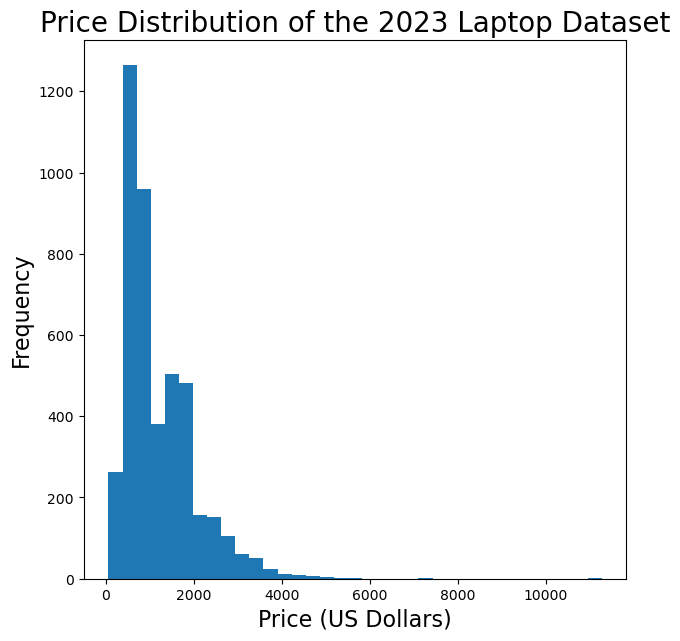

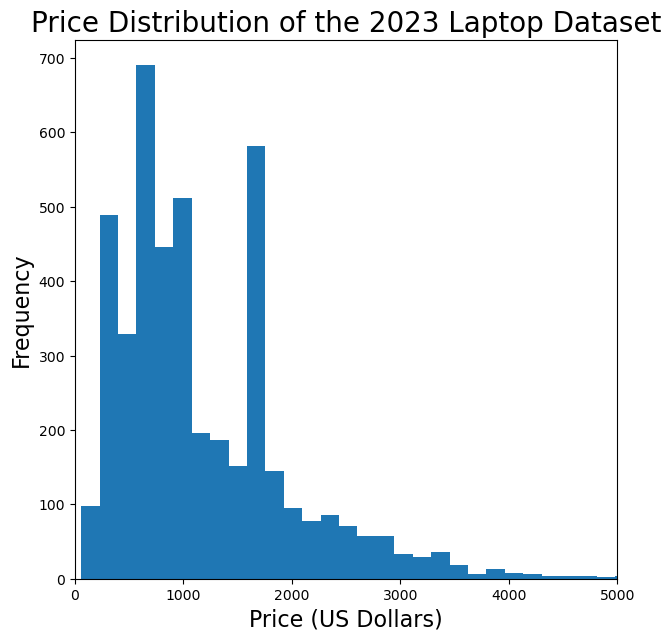

In [234]:
from matplotlib import pylab as plt

# visualize the target variable

print(int(np.sqrt(laptop_df.shape[0])))
plt.figure(figsize=(7,7))
plt.hist(laptop_df['price'], bins = 35)
plt.xlabel('Price (US Dollars)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Price Distribution of the 2023 Laptop Dataset', fontsize=20)
plt.savefig('figures/price_dist.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

plt.figure(figsize=(7,7))
plt.hist(laptop_df['price'], bins = 66)
plt.xlim(0, 5000)
plt.xlabel('Price (US Dollars)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Price Distribution of the 2023 Laptop Dataset', fontsize=20)
plt.savefig('figures/price_dist_zoom.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

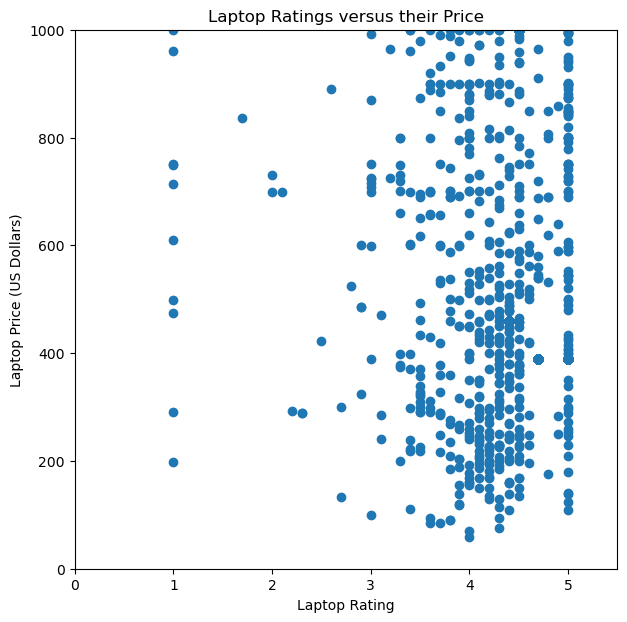

<Figure size 700x700 with 0 Axes>

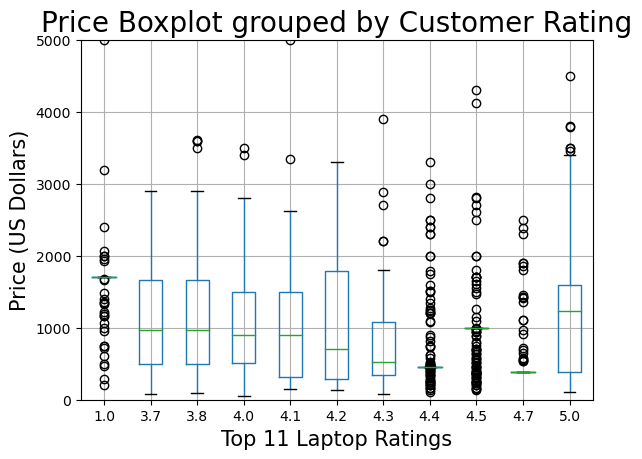

In [235]:
# Visualizations
modified_df = laptop_df[laptop_df['rating'].isin(laptop_df['rating'].value_counts().head(11).index)]
plt.figure(figsize=(7,7))
plt.scatter(laptop_df['rating'], laptop_df['price'])
plt.xlim(0, 5.5)
plt.ylim(0,1000)
plt.xlabel('Laptop Rating')
plt.ylabel('Laptop Price (US Dollars)')
plt.title('Laptop Ratings versus their Price')
plt.savefig('figures/ratings_price.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

plt.figure(figsize=(7,7))
modified_df.boxplot(column='price', by='rating')
plt.ylim(0, 5000)
plt.xlabel('Top 11 Laptop Ratings', fontsize=15)
plt.ylabel('Price (US Dollars)', fontsize =15)
plt.title('Price Boxplot grouped by Customer Rating', fontsize=20)
plt.suptitle('')
plt.savefig('figures/rating_boxplot.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

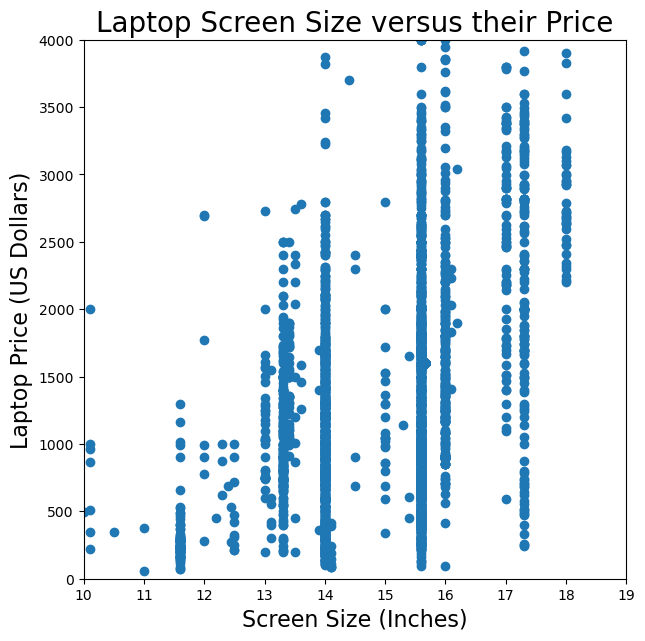

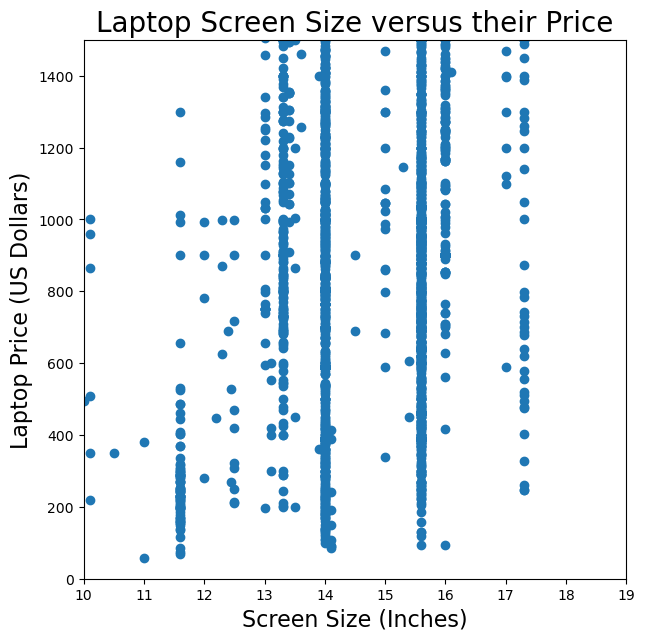

In [236]:
plt.figure(figsize=(7,7))
plt.scatter(laptop_df['screen_size'], laptop_df['price'])
plt.xlim(10, 19)
plt.ylim(0,4000)
plt.xlabel('Screen Size (Inches)', fontsize=16)
plt.ylabel('Laptop Price (US Dollars)', fontsize=16)
plt.title('Laptop Screen Size versus their Price', fontsize=20)
plt.savefig('figures/screen_scatter.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(laptop_df['screen_size'], laptop_df['price'])
plt.xlim(10, 19)
plt.ylim(0,1500)
plt.xlabel('Screen Size (Inches)', fontsize=16)
plt.ylabel('Laptop Price (US Dollars)', fontsize=16)
plt.title('Laptop Screen Size versus their Price', fontsize=20)
plt.savefig('figures/screen_zoom.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

61
ram
16.000     1343
32.000     1092
8.000       788
64.000      502
20.000      331
4.000       215
12.000       40
24.000       21
40.000       13
48.000       12
2.000         9
1.000         4
128.000       3
6.000         3
0.064         1
5.000         1
96.000        1
31.990        1
Name: count, dtype: int64


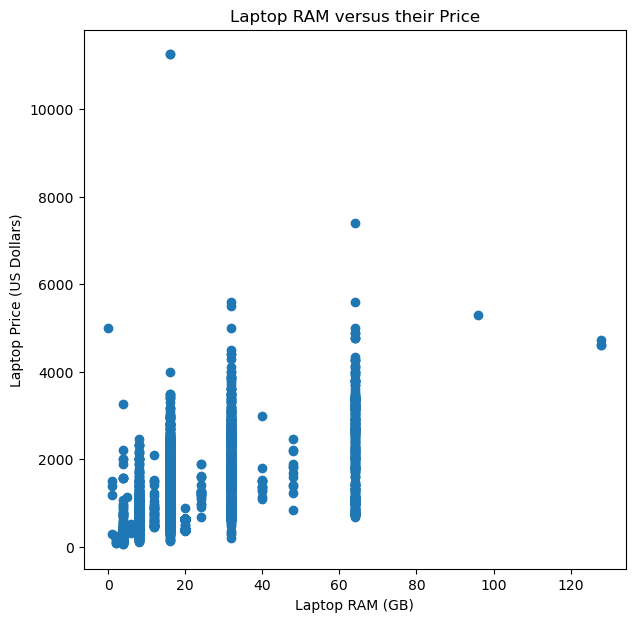

In [237]:
plt.figure(figsize=(7,7))
print(laptop_df['ram'].isna().sum())
print(laptop_df['ram'].value_counts())
plt.scatter(laptop_df['ram'], laptop_df['price'])
plt.xlabel('Laptop RAM (GB)')
plt.ylabel('Laptop Price (US Dollars)')
plt.title('Laptop RAM versus their Price')
plt.savefig('figures/ram.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

color
Black              1170
Silver              717
Blue                507
Core Black          393
Gray                230
                   ... 
Graphite Gray         1
Titan Gray Dull       1
Indigo Blue           1
Platinum Titan        1
Abyssal Black         1
Name: count, Length: 186, dtype: int64


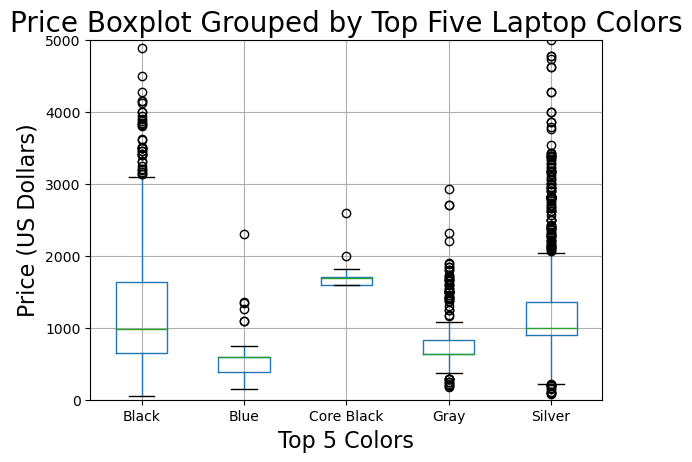

In [238]:
print(laptop_df['color'].value_counts())
modified_df = laptop_df[laptop_df['color'].isin(laptop_df['color'].value_counts().head(5).index)]
modified_df.boxplot(column='price', by='color')
plt.xlabel('Top 5 Colors', fontsize=16)
plt.ylabel('Price (US Dollars)', fontsize=16)
plt.title('Price Boxplot Grouped by Top Five Laptop Colors', fontsize=20)
plt.suptitle('')
plt.ylim(0,5000)
plt.savefig('figures/top_five_colors.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

special_features
Wifi & Bluetooth                                                                   815
Backlit Keyboard                                                                   339
Anti-glare Screen                                                                  163
Anti-glare                                                                          97
Anti Glare Coating                                                                  34
                                                                                  ... 
Fingerprint Reader, Backlit Keyboard, Memory Card Slot                               1
Anti-glare,Anti-glare Screen                                                         1
Anti-glare,Hd,Ultra-narrow Bezel                                                     1
Fingerprint Reader, High Definition Audio, Backlit Keyboard, Anti Glare Coating      1
HD Audio, Memory Card Slot                                                           1
Name: count, Length: 188, 

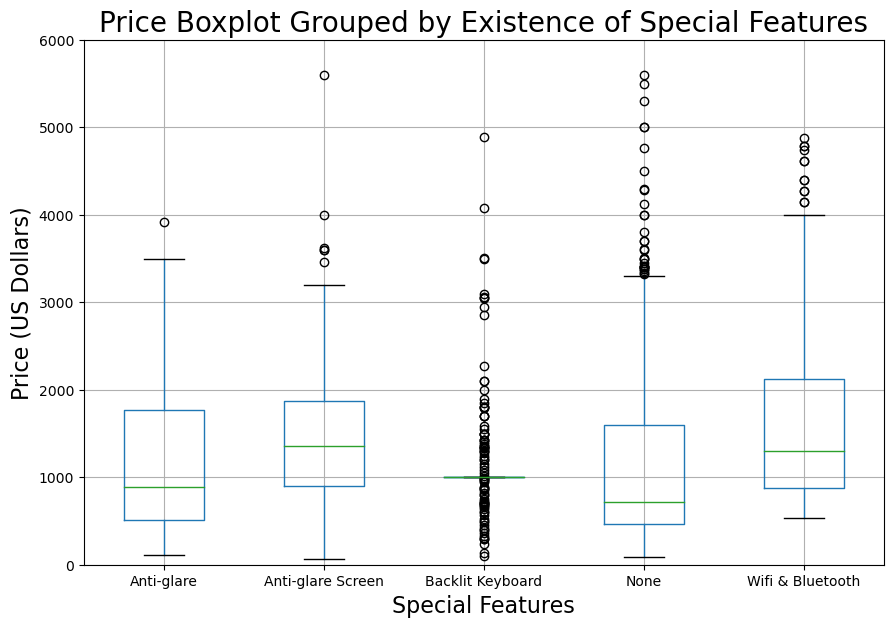

In [239]:
print(laptop_df['special_features'].value_counts())
laptop_df['special_features'].fillna('None', inplace=True)
modified_df = laptop_df[laptop_df['special_features'].isin(laptop_df['special_features'].value_counts().head(5).index)]

modified_df[['price', 'special_features']].boxplot(by = 'special_features',figsize=(10,7))
plt.xlabel('Special Features', fontsize=16)
plt.ylabel('Price (US Dollars)', fontsize=16)
plt.title('Price Boxplot Grouped by Existence of Special Features', fontsize=20)
plt.suptitle('')
plt.ylim(0,6000)
plt.savefig('figures/special_features.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# data splitting

X = laptop_df.drop('price', axis=1)
y = laptop_df['price']
random_state=42

X_other, X_test_pre, y_other, y_test = train_test_split(X, y, train_size = 0.8, random_state=random_state)

X_train_pre, X_val_pre, y_train, y_val = train_test_split(X_other, y_other, train_size=0.75, random_state = random_state)

print(X_train_pre.shape)
print(X_val_pre.shape)
print(X_test_pre.shape)

# categorical and continuous features

cat_ftrs=['brand', 'model', 'color', 'cpu', 'OS', 'special_features', 'graphics', 'graphics_coprocessor', 'cpu_speed']
cont_ftrs = ['screen_size', 'harddisk', 'ram', 'rating']

(2664, 13)
(888, 13)
(889, 13)


In [203]:
# write a function to do the ML pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
X = laptop_df.drop('price', axis=1)
y = laptop_df['price']
def ML_pipeline(X, y, preprocessor, ML_algo, param_grid, title):
    train_scores = []
    test_scores = []
    best_models = []
    baseline_scores = []

    for random_state in range(1, 11):
        X_other, X_test, y_other, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
        baseline_pred = np.full(len(y_test), y_test.mean())
        baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
        baseline_scores.append(baseline_rmse)
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        pipeline = Pipeline([('preprocessor', preprocessor), ('model', ML_algo)])
        grid = GridSearchCV(
            pipeline, param_grid, cv=kf, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False), 
            return_train_score=True, n_jobs=-2)
        grid.fit(X_other, y_other)
        y_pred = grid.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        test_scores.append(rmse)
        best_models.append(grid.best_estimator_)

    
    print(f'Baseline RMSE: {np.mean(baseline_scores)}')
    print(f'Baseline Standard Deviation: {np.std(baseline_scores)}')
    plt.figure(figsize=(5,5))
    plt.plot(range(10), baseline_scores, label='Baseline RMSE')
    plt.plot(range(10), test_scores, label=title)
    plt.legend()
    plt.xlabel('Random State')
    plt.ylabel('Root Mean Squared Error')
    plt.title(title + ' versus the Baseline Score')
    plt.savefig(f'figures/{title}.jpeg', dpi=300)
    plt.show()
    return test_scores, best_models


Baseline RMSE: 817.6739819051684
Baseline Standard Deviation: 37.402934069959706


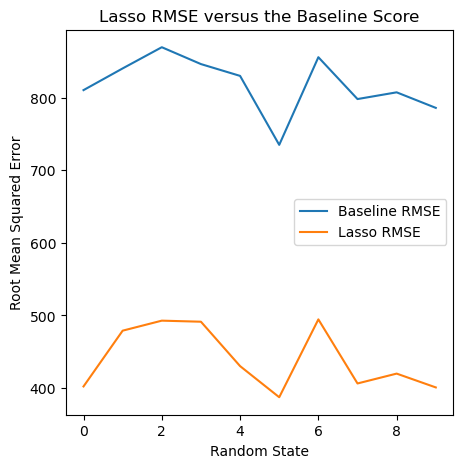

Best Lasso: [402.1995629434267, 478.9952530921393, 492.7856548650135, 491.3212532040457, 430.1987819597242, 387.3539692774135, 494.54162115666287, 406.3009812095143, 419.87329348456836, 400.8460323816829]
Lasso Mean: 440.44164035741915
Lasso Std. Dev: 41.57396656618968
Baseline RMSE: 817.6739819051684
Baseline Standard Deviation: 37.402934069959706


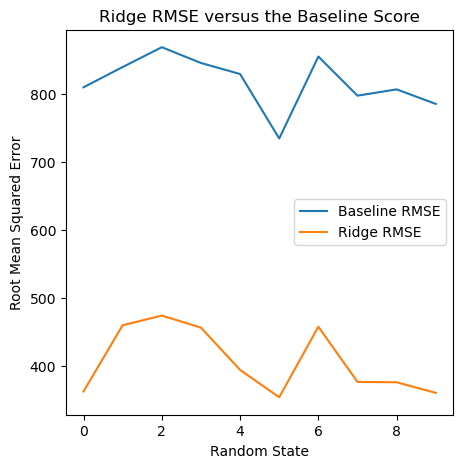

Best Ridge: [362.13170141197907, 459.70751473936247, 473.96489503419764, 456.20562509487826, 393.9494620581872, 353.6703550534409, 457.5349008729346, 376.2099339909285, 375.6966303073931, 360.06554278658416]
Ridge Mean: 406.91365613498857
Ridge Std. Dev: 46.25535499083271
Baseline RMSE: 817.6739819051684
Baseline Standard Deviation: 37.402934069959706


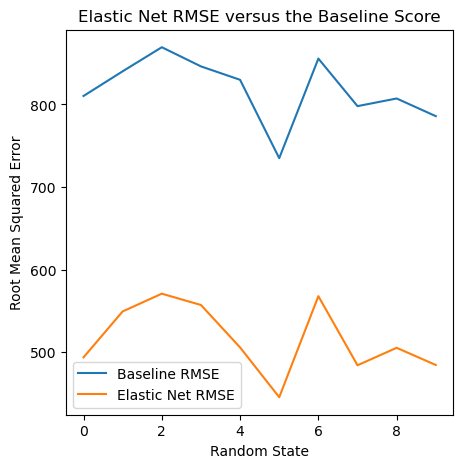

Best Elastic Net: [493.5850637818438, 549.2172578685472, 570.701429326699, 556.9978934726904, 505.5993025627516, 445.26606692917966, 567.7058870035785, 483.9721375957139, 505.1212378488639, 484.3144129474168]
Elastic Net Mean: 516.2480689337284
Elastic Net Std. Dev: 40.263313639420794
Baseline RMSE: 817.6739819051684
Baseline Standard Deviation: 37.402934069959706


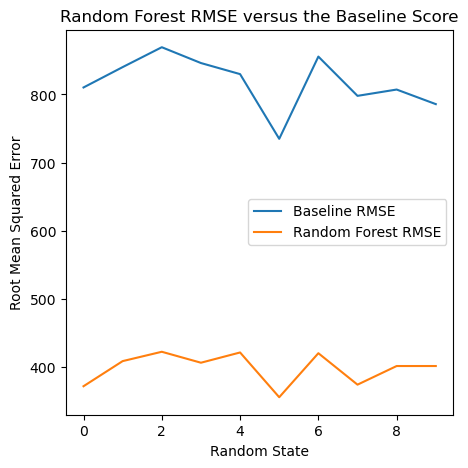

Best Random Forest: [371.72816920378835, 408.5891227947942, 422.3018795003554, 406.23021015877475, 421.2698290428869, 355.5887021436027, 420.18999502991255, 374.0340285702267, 401.36916069568593, 401.382989000368]
Random Forest Mean: 398.2684086140396
Random Forest Std. Dev: 22.112662760359605


In [204]:
# preprocessor for non-XGBoost methods
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator = LinearRegression(), random_state=42)),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
  transformers = [
       ('cat', categorical_transformer, cat_ftrs), 
       ('cont', numeric_transformer, cont_ftrs)])

ML_algo= Lasso()
param_grid = {'model__alpha': [1, 10, 100]}

lasso_test_scores, best_models = ML_pipeline(X, y, preprocessor, ML_algo, param_grid, 'Lasso RMSE')

print(f'Best Lasso: {lasso_test_scores}')
print(f'Lasso Mean: {np.mean(lasso_test_scores)}')
print(f'Lasso Std. Dev: {np.std(lasso_test_scores)}')

ridge_param_grid = {'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
ML_algo=Ridge()
ridge_test_scores, best_models = ML_pipeline(X, y, preprocessor, ML_algo, ridge_param_grid, 'Ridge RMSE')

print(f'Best Ridge: {ridge_test_scores}')
print(f'Ridge Mean: {np.mean(ridge_test_scores)}')
print(f'Ridge Std. Dev: {np.std(ridge_test_scores)}')

elastic_net_param_grid = {
    'model__alpha': [1, 10, 100],
    'model__l1_ratio': [0.1, 0.5, 0.9],
    'model__max_iter': [1000, 2000, 5000]
}


ML_algo = ElasticNet()
en_test_scores, best_models = ML_pipeline(X, y, preprocessor, ML_algo, elastic_net_param_grid, 'Elastic Net RMSE')
print(f'Best Elastic Net: {en_test_scores}')
print(f'Elastic Net Mean: {np.mean(en_test_scores)}')
print(f'Elastic Net Std. Dev: {np.std(en_test_scores)}')

rf_param_grid = {'model__n_estimators': [30, 50], 
                 'model__max_depth': [1, 5, 10]}
ML_algo=RandomForestRegressor()
rf_test_scores, best_models = ML_pipeline(X, y, preprocessor, ML_algo, rf_param_grid, 'Random Forest RMSE')

print(f'Best Random Forest: {rf_test_scores}')
print(f'Random Forest Mean: {np.mean(rf_test_scores)}')
print(f'Random Forest Std. Dev: {np.std(rf_test_scores)}')

In [245]:
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import ParameterGrid

baseline_scores = []

# function for top ten features using various XGBoost importance metrics

def top_ten_features(importance, feature_names):
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    top_ten = sorted_importance[:10]
    top_feature_names = [feature_names[int(feature[1:])] for feature, _ in top_ten]
    print(top_feature_names)
    return top_feature_names, top_ten

cat_ftrs = ['brand', 'model', 'color', 'cpu', 'OS', 'special_features', 'graphics', 'graphics_coprocessor', 'cpu_speed']
cont_ftrs = ['screen_size', 'harddisk', 'ram', 'rating']

#preprocessor for XGBoost

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_ftrs),
        ('cont', num_transformer, cont_ftrs)])

param_grid = {
    "learning_rate": [0.03],
    "n_estimators": [5000],
    "seed": [0],
    "missing": [np.nan],
    "eval_metric": ['logloss'],
    "max_depth": [1, 5, 10],
    "colsample_bytree": [0.9],
    "subsample": [0.66],
}

pg = ParameterGrid(param_grid)

# Initialize an XGBoost model

XGB = XGBRegressor()
X = laptop_df.drop('price', axis=1)
y = laptop_df['price']

# XGBoost function including SHAP values/feature importance

def train_XGB(X, y, pg, preprocessor, XGB):
    test_scores = []
    
    for i in range(1, 11):
        print(f'random_state: {i}')
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        baseline_pred = np.full(len(y_test), y_test.mean())
        baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
        baseline_scores.append(baseline_rmse)
        X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=i)
        X_train_prep = preprocessor.fit_transform(X_train)
        feature_names = preprocessor.get_feature_names_out()
        df_train = pd.DataFrame(data=X_train_prep, columns=feature_names)
        X_CV_prep = preprocessor.transform(X_CV)
        df_val = pd.DataFrame(data=X_CV_prep, columns=feature_names)
        X_test_prep = preprocessor.transform(X_test)
        df_test = pd.DataFrame(data=X_test_prep, columns=feature_names)

        models = []
        train_rmse = np.zeros(len(pg))
        val_rmse = np.zeros(len(pg))
        
        for j in range(len(pg)):
            params = pg[j]
            XGB.set_params(**params, use_label_encoder=False, random_state=i)
            eval_set = [(X_CV_prep, y_CV)]
            XGB.fit(X=X_train_prep, y=y_train, early_stopping_rounds=50, eval_set=eval_set, verbose=False)
            models.append(XGB)
            y_CV_pred = XGB.predict(X_CV_prep)
            y_train_pred = XGB.predict(X_train_prep)
            train_rmse[j] = np.sqrt(mean_squared_error(y_train, y_train_pred))
            val_rmse[j] = np.sqrt(mean_squared_error(y_CV, y_CV_pred))
            
        best_models.append(models[np.argmin(val_rmse)])
        y_test_pred = best_models[-1].predict(X_test_prep)
        test_score = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_scores.append(test_score)
    

    top_weight_names, top_ten_weight = top_ten_features(weight_importance, feature_names)
    top_gain_names, top_ten_gain = top_ten_features(gain_importance, feature_names)
    top_cover_names, top_ten_cover = top_ten_features(cover_importance, feature_names)
    top_totalgain_names, top_ten_total_gain = top_ten_features(total_gain_importance, feature_names)
    top_totalcover_names, top_ten_total_cover = top_ten_features(total_cover_importance, feature_names)

    plt.figure(figsize=(10, 5))
    plt.bar(range(10), [score for feature, score in top_ten_weight])
    plt.xticks(range(10), top_weight_names, rotation=90)
    plt.xlabel('Top Features')
    plt.ylabel('Importance Score by Weight')
    plt.title('Top Ten Features by Weight')
    plt.savefig('figures/weight.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(range(10), [score for feature, score in top_ten_gain])
    plt.xticks(range(10), top_gain_names, rotation=90)
    plt.xlabel('Top Features')
    plt.ylabel('Importance Score by Gain')
    plt.title('Top Ten Features by Gain')
    plt.savefig('figures/gain.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(range(10), [score for feature, score in top_ten_cover])
    plt.xticks(range(10), top_cover_names, rotation=90)
    plt.xlabel('Top Features')
    plt.ylabel('Importance Score by Cover')
    plt.title('Top Ten Features by Cover')
    plt.savefig('figures/cover.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(range(10), [score for feature, score in top_ten_total_gain])
    plt.xticks(range(10), top_totalgain_names, rotation=90)
    plt.xlabel('Top Features')
    plt.ylabel('Importance Score by Total Gain')
    plt.title('Top Ten Features by Total Gain')
    plt.savefig('figures/totalgain.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(range(10), [score for feature, score in top_ten_total_cover])
    plt.xticks(range(10), top_totalcover_names, rotation=90)
    plt.xlabel('Top Features')
    plt.ylabel('Importance Score by Total Cover')
    plt.title('Top Ten Features by Total Cover')
    plt.savefig('figures/totalcover.jpg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()
    
    # Print mean and standard deviation of test scores
    plt.figure(figsize=(5, 5))
    plt.plot(range(10), baseline_scores, label='Baseline RMSE')
    plt.plot(range(10), test_scores, label='XGBoost RMSE')
    plt.legend()
    plt.xlabel('Random State')
    plt.ylabel('Root Mean Squared Error')
    plt.title('XGBoost RMSE versus the Baseline Score')
    plt.show()

    shap.initjs() # required for visualizations later on

    df_test_transform = df_test.values

    explainer = shap.TreeExplainer(XGB)

    shap_values = explainer.shap_values(df_test_transform)


    shap.summary_plot(shap_values, df_test_transform,feature_names =df_test.columns, plot_type="bar", show=False, max_display=10)
    plt.xlabel('mean(|SHAP value|)')
    plt.title('Summary Plot of Global Feature Importance using SHAP Values')
    plt.savefig('figures/shap.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()

    expected_value = explainer.expected_value
    shap.force_plot(expected_value, shap_values[0, :], features=df_test_transform[0, :], feature_names=feature_names, matplotlib=True, show=False)
    plt.title('Local Feature Importance at Index 0')
    plt.savefig('figures/local0.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    #plt.show()

    shap.force_plot(expected_value, shap_values[100, :], features=df_test_transform[100, :], feature_names=feature_names, matplotlib=True, show=False)
    plt.title('Local Feature Importance at Index 100')
    plt.savefig('figures/local100.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    #plt.show()
    
    print("Mean Test Score:", np.mean(test_scores))
    print("Standard Deviation of Test Accuracy:", np.std(test_scores))
    return test_scores, best_models, test_sets

random_state: 1


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 2


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 3


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 4


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 5


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 6


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 7


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 8


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 9


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


random_state: 10


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


['cont__harddisk', 'cont__ram', 'cont__rating', 'cont__screen_size', 'cat__cpu_Core i5', 'cat__OS_Windows 11 Home', 'cat__brand_Dell', 'cat__OS_Windows 10 Pro', 'cat__OS_Windows 11 Pro', 'cat__OS_Windows 10 Home']
['cat__graphics_Integrated', 'cat__cpu_Core i9', 'cat__graphics_coprocessor_Intel', 'cat__cpu_speed_1.1 GHz', 'cat__OS_Windows 11', 'cat__cpu_Core i7', 'cont__screen_size', 'cont__ram', 'cat__graphics_Nvidia GeForce RTX 3050 Ti', 'cat__cpu_speed_1 GHz']
['cat__special_features_Anti-glare,Backlit Keyboard', 'cat__color_Pine Grey', 'cat__graphics_coprocessor_NVIDIA GeForce RTX 2070', 'cat__graphics_coprocessor_Intel HD Graphics 530', 'cat__model_ThinkPad L13 YOGA', 'cat__graphics_Nvidia GeForce MX350', 'cat__graphics_coprocessor_Intel UHD Graphics 630', 'cat__graphics_coprocessor_AMD Integrated Graphics', 'cat__graphics_RTX A5000,UHD Graphics', 'cat__graphics_coprocessor_NVIDIA GeForce RTX A2000']
['cat__graphics_Integrated', 'cont__ram', 'cont__screen_size', 'cat__cpu_Core i9'

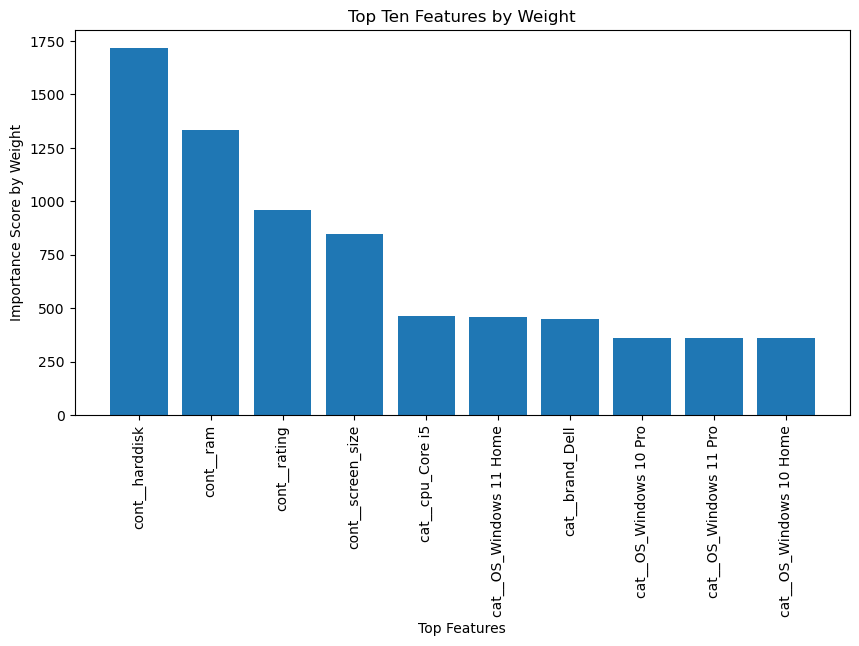

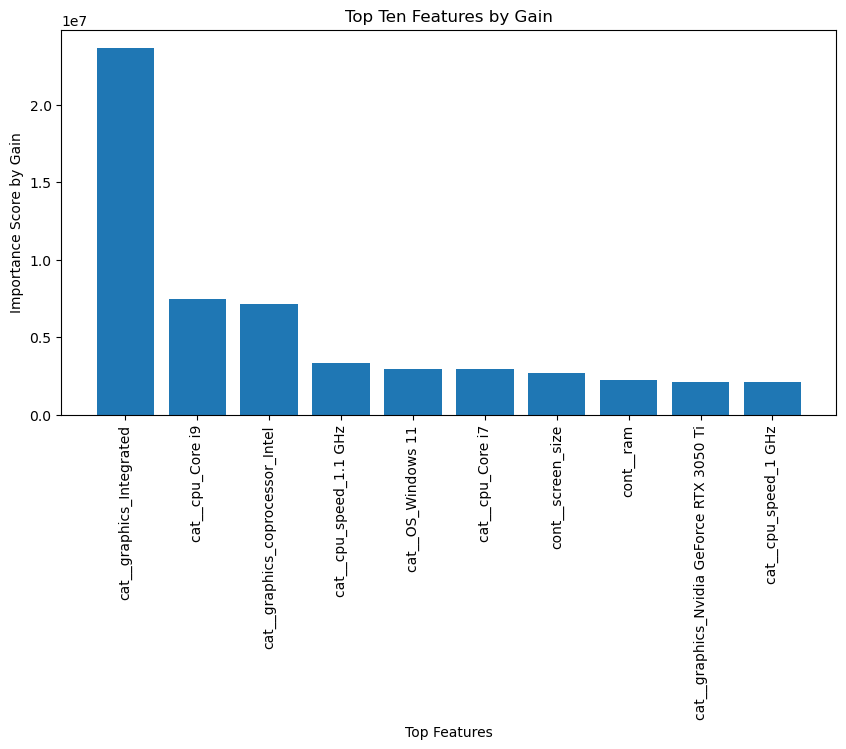

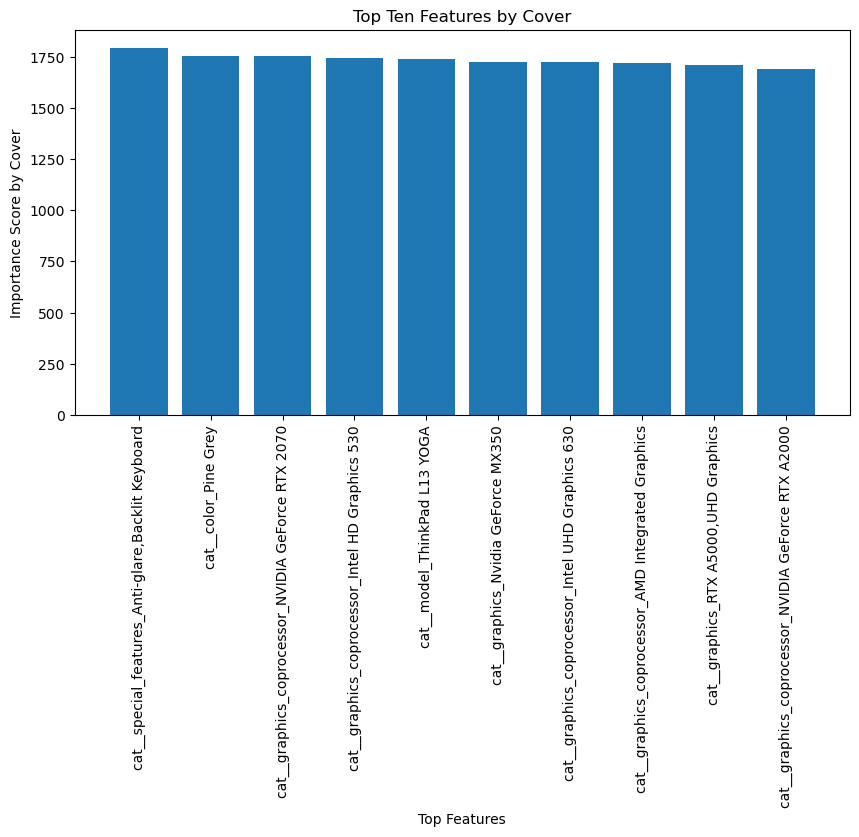

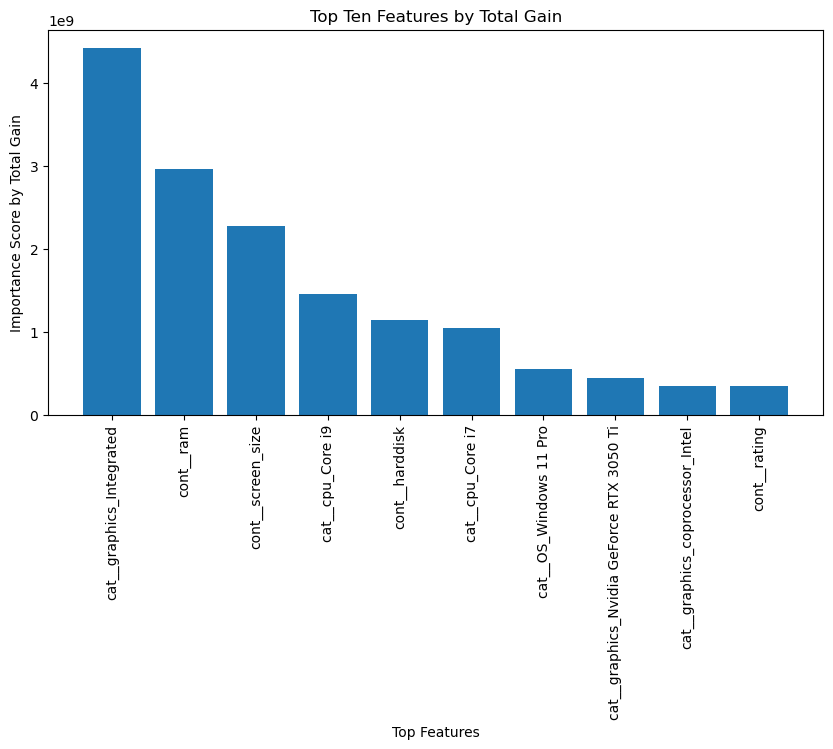

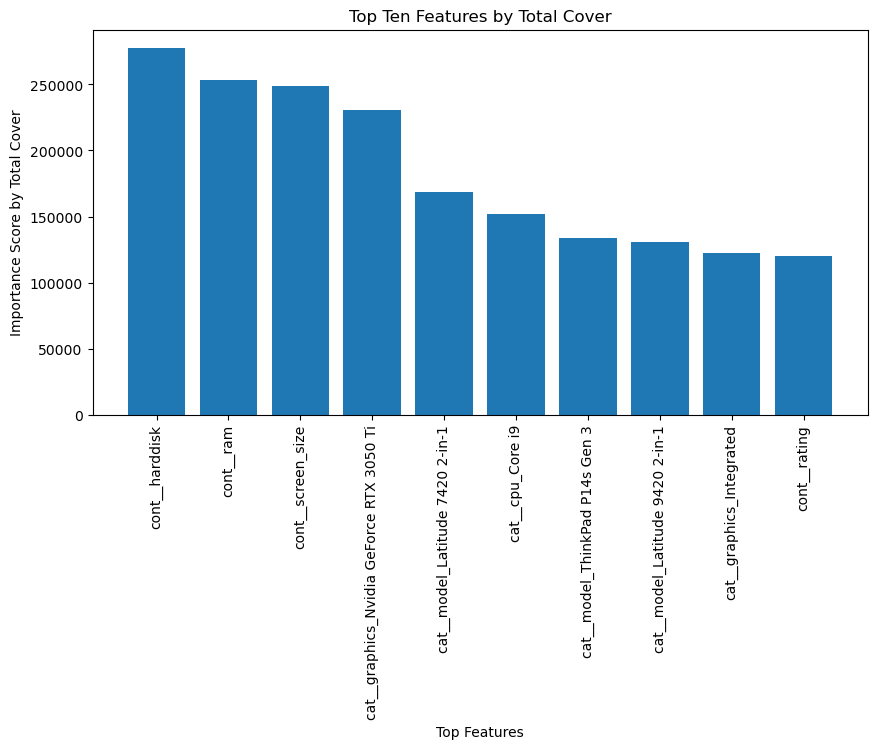

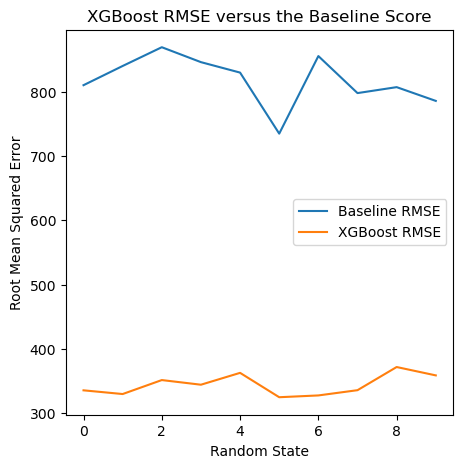

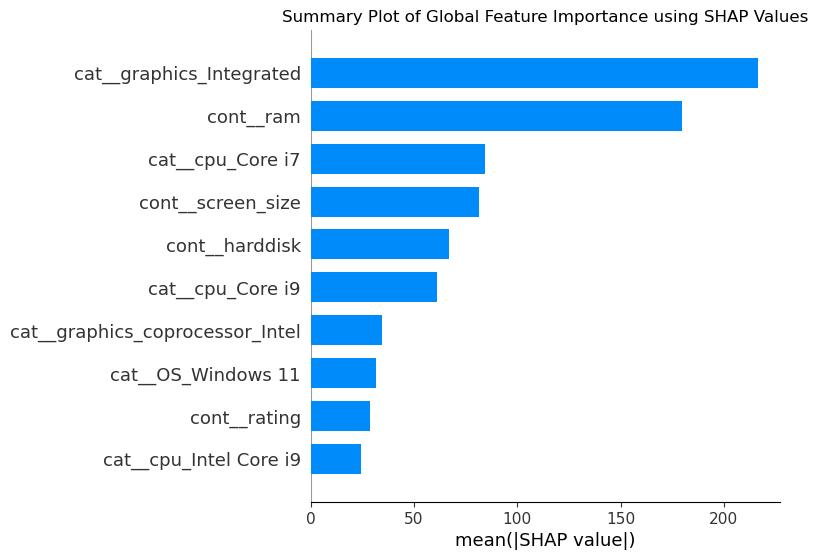

Mean Test Score: 344.17511184583674
Standard Deviation of Test Accuracy: 15.414346530470207
[335.4559932623755, 329.69043057872557, 351.4203274197794, 344.19648100113403, 362.6457520371431, 324.7343667912149, 327.51432907554766, 335.68829058829346, 371.7092977665646, 358.695849937589]


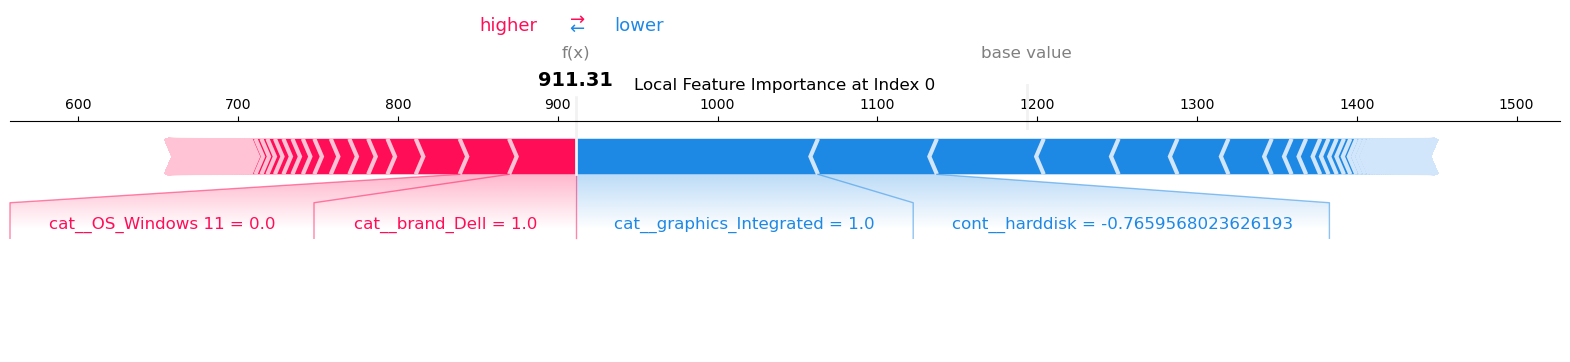

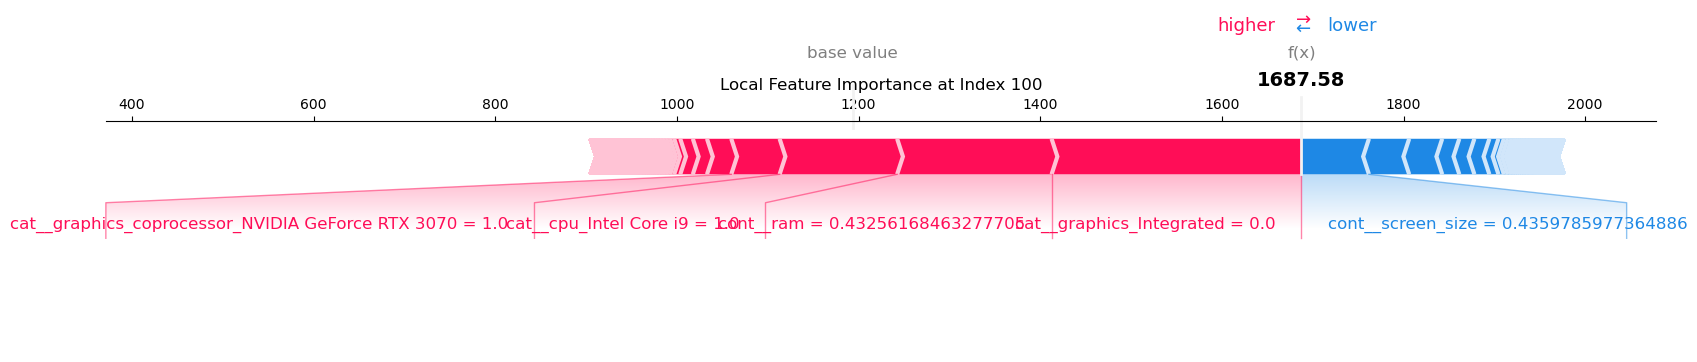

In [246]:
xgb_test_scores, best_models, test_sets = train_XGB(X, y, pg, preprocessor, XGB)
print(xgb_test_scores)

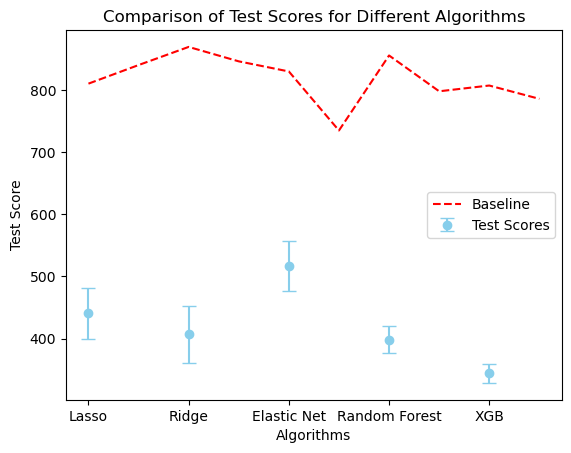

In [226]:
# plot of all algorithms against the baseline

algorithms = ['Lasso', 'Ridge', 'Elastic Net', 'Random Forest', 'XGB']
mean_scores = [np.mean(lasso_test_scores), np.mean(ridge_test_scores), np.mean(en_test_scores), np.mean(rf_test_scores), np.mean(xgb_test_scores)]
std_devs = [np.std(lasso_test_scores), np.std(ridge_test_scores), np.std(en_test_scores), np.std(rf_test_scores), np.std(xgb_test_scores)]

tick_positions = np.arange(len(algorithms)) * 2
plt.errorbar(tick_positions, mean_scores, yerr=std_devs, capsize=5, color='skyblue', label='Test Scores', fmt='o')
plt.plot(baseline_scores, color='red', linestyle='--', label='Baseline')

plt.xlabel('Algorithms')
plt.ylabel('Test Score')
plt.xticks(tick_positions, algorithms)
plt.title('Comparison of Test Scores for Different Algorithms')
plt.legend()
plt.savefig('figures/mlalgos.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()